# 0. Setup Paths

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#!pip list

In [87]:
import os
import tensorflow as tf

In [88]:
#rm -rf /content/drive/MyDrive/TFOD/

In [89]:
#print(tf.config.list_physical_devices('GPU'))

In [90]:
!nvidia-smi

Wed Oct 26 16:49:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |   2488MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [91]:
########################################################
##################  For Colab  #########################
########################################################

if not os.path.exists("/content/drive/MyDrive/ANPR_and_EasyOCR/"):
  !mkdir -p "/content/drive/MyDrive/ANPR_and_EasyOCR/"

In [92]:
cd '/content/drive/MyDrive/ANPR_and_EasyOCR/'

/content/drive/MyDrive/ANPR_and_EasyOCR


In [93]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord_edited_for_kaggle_Dataset.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
TRAINING_STEPS = 100000

In [94]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
    }

In [95]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [96]:
files

{'PIPELINE_CONFIG': 'Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow/scripts/generate_tfrecord_edited_for_kaggle_Dataset.py',
 'LABELMAP': 'Tensorflow/workspace/annotations/label_map.pbtxt'}

In [97]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [98]:
paths

{'WORKSPACE_PATH': 'Tensorflow/workspace',
 'SCRIPTS_PATH': 'Tensorflow/scripts',
 'APIMODEL_PATH': 'Tensorflow/models',
 'ANNOTATION_PATH': 'Tensorflow/workspace/annotations',
 'IMAGE_PATH': 'Tensorflow/workspace/images',
 'MODEL_PATH': 'Tensorflow/workspace/models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow/workspace/pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet',
 'OUTPUT_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet/export',
 'TFJS_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport',
 'TFLITE_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport',
 'PROTOC_PATH': 'Tensorflow/protoc'}

In [99]:
pwd

'/content/drive/MyDrive/ANPR_and_EasyOCR'

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [17]:
# https://www.tensorflow.org/install/source_windows

In [18]:
if os.name=='nt':
    !pip install wget
    import wget

In [19]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 78273, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 78273 (delta 40), reused 66 (delta 33), pack-reused 78197
Receiving objects: 100% (78273/78273), 593.54 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (55660/55660), done.
Checking out files: 100% (3188/3188), done.


In [20]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    #url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.6/protoc-3.19.6-win64.zip"
    wget.download(url)
    #!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !move protoc-3.19.6-win64.zip {paths['PROTOC_PATH']}
    #!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/ANPR_and_EasyOCR/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 25.7 MB/s 
     

In [21]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-10-26 13:48:44.780355: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 13:48:45.805398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 13:48:45.805621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 13:48:45.805644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [22]:
# if you don't see 'OK (skipped=1)' thing in above cell then you must be encountered with errors
# just simply uninstall and re-install packages which are shown in the errors

# pip uninstall protobuf matplotlib -y
# pip install protobuf matplotlib==3.2.2
#!pip install tensorflow-gpu --upgrade
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib
#!pip install Pillow
#!pip install pyyaml==5.3.1

In [23]:
import object_detection

In [24]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-10-26 13:49:27--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c0f::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  72.6MB/s    in 0.3s    

2022-10-26 13:49:28 (72.6 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-

# 2. Create Label Map

In [25]:
files['LABELMAP']

'Tensorflow/workspace/annotations/label_map.pbtxt'

In [26]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [27]:
# OPTIONAL IF RUNNING ON COLAB --> Move archive.tar file in 'Tensorflow/workspace/images' folder or 'IMAGE_PATH'
# if running localy --> Move 'test' and 'train' folder in 'Tensorflow/workspace/images' folder or 'IMAGE_PATH'
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

dataset/images_with_annotations/test/
dataset/images_with_annotations/test/Cars105.png
dataset/images_with_annotations/test/Cars105.xml
dataset/images_with_annotations/test/Cars107.png
dataset/images_with_annotations/test/Cars107.xml
dataset/images_with_annotations/test/Cars111.png
dataset/images_with_annotations/test/Cars111.xml
dataset/images_with_annotations/test/Cars113.png
dataset/images_with_annotations/test/Cars113.xml
dataset/images_with_annotations/test/Cars119.png
dataset/images_with_annotations/test/Cars119.xml
dataset/images_with_annotations/test/Cars120.png
dataset/images_with_annotations/test/Cars120.xml
dataset/images_with_annotations/test/Cars123.png
dataset/images_with_annotations/test/Cars123.xml
dataset/images_with_annotations/test/Cars130.png
dataset/images_with_annotations/test/Cars130.xml
dataset/images_with_annotations/test/Cars14.png
dataset/images_with_annotations/test/Cars14.xml
dataset/images_with_annotations/test/Cars140.png
dataset/images_with_annotations/t

In [28]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/mazqoty/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [29]:
#os.path.join(paths['IMAGE_PATH'], 'train')               # Tensorflow/workspace/images/train
#files['TF_RECORD_SCRIPT']                                # Tensorflow/scripts/generate_tfrecord.py
#files['LABELMAP']                                        # Tensorflow/workspace/annotations/label_map.pbtxt
#os.path.join(paths['ANNOTATION_PATH'], 'train.record')   # Tensorflow/workspace/annotations/train.record

In [30]:
# #Create TFRecords from XML Files
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

# # Create TFRecords from CSV Files
# !python {files['TF_RECORD_SCRIPT']} --csv_input={os.path.join(paths['IMAGE_PATH'], 'train', 'train.csv')} --image_dir={os.path.join(paths['IMAGE_PATH'], 'train')} --output_path={os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
# !python {files['TF_RECORD_SCRIPT']} --csv_input={os.path.join(paths['IMAGE_PATH'], 'test', 'test.csv')} --image_dir={os.path.join(paths['IMAGE_PATH'], 'test')} --output_path={os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

2022-10-26 14:11:33.618454: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
2022-10-26 14:11:38.737696: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


In [37]:
!du -sh Tensorflow/workspace/annotations/train.record # gives size of filename

163M	Tensorflow/workspace/annotations/train.record


In [38]:
!du -sh Tensorflow/workspace/annotations/test.record

41M	Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [39]:
os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')

'Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'

In [40]:
os.path.join(paths['CHECKPOINT_PATH'])

'Tensorflow/workspace/models/my_ssd_mobnet'

In [41]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [42]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [43]:
files['PIPELINE_CONFIG']

'Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config'

In [44]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [45]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [46]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [47]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [48]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [57]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [50]:
command = "python {} \
--model_dir={} \
--pipeline_config_path={} \
--num_train_steps={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], TRAINING_STEPS)

In [51]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=100000


In [52]:
!{command}

Streaming output truncated to the last 5000 lines.
 'Loss/regularization_loss': 0.06148354,
 'Loss/total_loss': 0.1219285,
 'learning_rate': 0.0}
I1026 15:35:16.722234 140625704118144 model_lib_v2.py:708] {'Loss/classification_loss': 0.029637098,
 'Loss/localization_loss': 0.03080786,
 'Loss/regularization_loss': 0.06148354,
 'Loss/total_loss': 0.1219285,
 'learning_rate': 0.0}
INFO:tensorflow:Step 58500 per-step time 0.076s
I1026 15:35:24.323823 140625704118144 model_lib_v2.py:707] Step 58500 per-step time 0.076s
INFO:tensorflow:{'Loss/classification_loss': 0.06622636,
 'Loss/localization_loss': 0.018985633,
 'Loss/regularization_loss': 0.06148354,
 'Loss/total_loss': 0.14669552,
 'learning_rate': 0.0}
I1026 15:35:24.324104 140625704118144 model_lib_v2.py:708] {'Loss/classification_loss': 0.06622636,
 'Loss/localization_loss': 0.018985633,
 'Loss/regularization_loss': 0.06148354,
 'Loss/total_loss': 0.14669552,
 'learning_rate': 0.0}
INFO:tensorflow:Step 58600 per-step time 0.074s
I10

# 7. Evaluate the Model

In [53]:
print(TRAINING_SCRIPT)               
print(paths['CHECKPOINT_PATH'])      
print(files['PIPELINE_CONFIG'])
paths['CHECKPOINT_PATH']

Tensorflow/models/research/object_detection/model_main_tf2.py
Tensorflow/workspace/models/my_ssd_mobnet
Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config


'Tensorflow/workspace/models/my_ssd_mobnet'

In [54]:
command = "python {} \
--model_dir={} \
--pipeline_config_path={} \
--checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [55]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [56]:
!{command}

2022-10-26 16:29:20.268584: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 16:29:21.106375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:29:21.106565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:29:21.106585: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# 8. Load Train Model From Checkpoint

In [58]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [59]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-100')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [60]:
paths['CHECKPOINT_PATH']

'Tensorflow/workspace/models/my_ssd_mobnet'

# 9. Detect from an Image

In [61]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

In [62]:
files['LABELMAP']

'Tensorflow/workspace/annotations/label_map.pbtxt'

In [63]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [64]:
category_index

{1: {'id': 1, 'name': 'licence'}}

In [65]:
paths['IMAGE_PATH']

'Tensorflow/workspace/images'

In [66]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars105.png')

In [67]:
MAX_BOXES_TO_DRAW = 5
MIN_SCORE_THRES = 0.6

In [68]:
def detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES):
  image_np = np.array(img)

  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=MAX_BOXES_TO_DRAW,
              min_score_thresh=MIN_SCORE_THRES,
              agnostic_mode=False)
  
  return image_np_with_detections

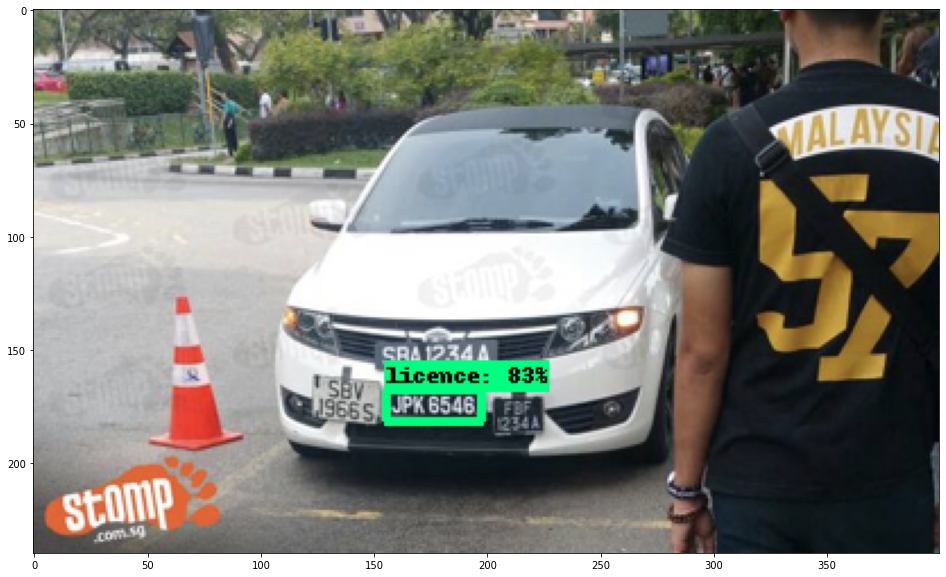

In [69]:
rcParams['figure.figsize'] = 20, 10
img = cv2.imread(IMAGE_PATH)

image_np_with_detections = detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [70]:
# Some Random Images

In [71]:
testImagesPath = []
for root, dirs, files in os.walk(os.path.join(paths['IMAGE_PATH'], 'test')):
    for filename in files:
        if filename.find(".xml") == -1:
          testImagesPath.append(f"{root}/{filename}")

#testImagesPath

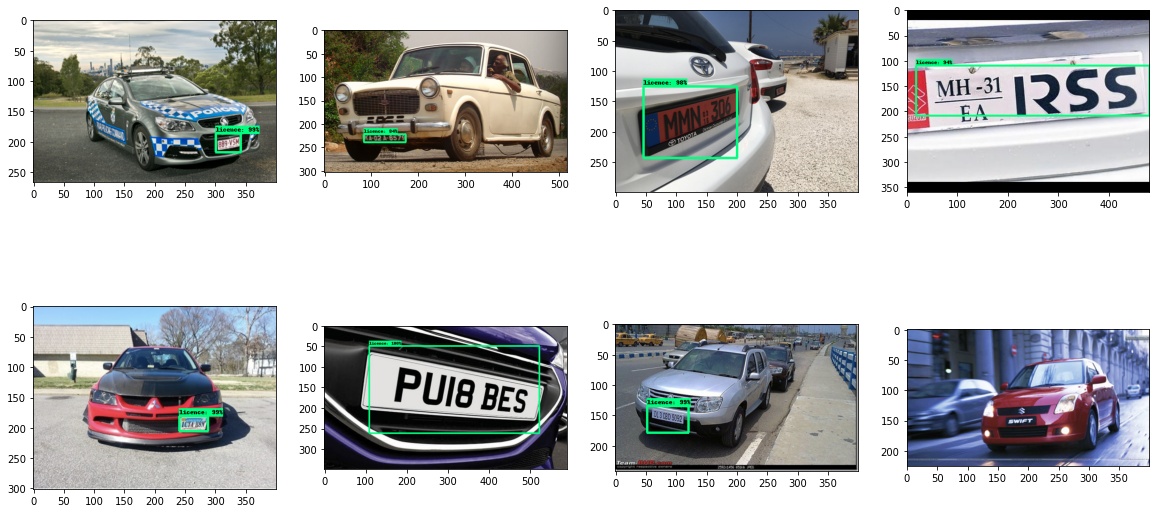

In [72]:
#Some random images to display at a time along with their true and random labels
rcParams['figure.figsize'] = 20, 10

num_row = 2
num_col = 4

imageId = np.random.randint(0, len(testImagesPath), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col) + j

        img = cv2.imread(testImagesPath[imageId[k]])
        
        image_np_with_detections = detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES)

        axes[i,j].imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
        # axes[i,j].set_title("", fontsize=14)
        #axes[i,j].axis('off')
        #fig.suptitle("", fontsize = 18) 

plt.show()

# 10. Real Time Detections from your Webcam (Local)

In [ ]:
#!pip uninstall opencv-python-headless -y

In [ ]:
# cap = cv2.VideoCapture(0)
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# while cap.isOpened(): 
#     ret, frame = cap.read()
#     image_np = np.array(frame)
    
#     input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
#     detections = detect_fn(input_tensor)
    
#     num_detections = int(detections.pop('num_detections'))
#     detections = {key: value[0, :num_detections].numpy()
#                   for key, value in detections.items()}
#     detections['num_detections'] = num_detections

#     # detection_classes should be ints.
#     detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

#     label_id_offset = 1
#     image_np_with_detections = image_np.copy()

#     viz_utils.visualize_boxes_and_labels_on_image_array(
#                 image_np_with_detections,
#                 detections['detection_boxes'],
#                 detections['detection_classes']+label_id_offset,
#                 detections['detection_scores'],
#                 category_index,
#                 use_normalized_coordinates=True,
#                 max_boxes_to_draw=5,
#                 min_score_thresh=.8,
#                 agnostic_mode=False)

#     cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         cap.release()
#         cv2.destroyAllWindows()
#         break

# 11. REAL TIME: From Google Colab Access, Local Webcam for Images and Video

[Reference Code Snippet](https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=ilLkpcKanPRb)

## Images

In [73]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

### Helper Functions For Images
Below are a few helper function to make converting between different image data types and formats. 

In [74]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [75]:
def detectionsColabWEBCAM(filename, detect_func):
  rcParams['figure.figsize'] = 20, 10
  img = cv2.imread(filename)
  
  image_np_with_detections = detect_func(img, MAX_BOXES_TO_DRAW, MIN_SCORE_THRES)

  plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
  plt.show()

## Webcam Images
Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.

In [76]:
def take_photo(filename='/content/drive/MyDrive/TFOD/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print("Shape: ", gray.shape)
  # save image
  cv2.imwrite(filename, img)

  return filename

### Capture and Detect

<IPython.core.display.Javascript object>

Shape:  (480, 640)
Saved to /content/drive/MyDrive/ANPR_and_EasyOCR/photo.jpg


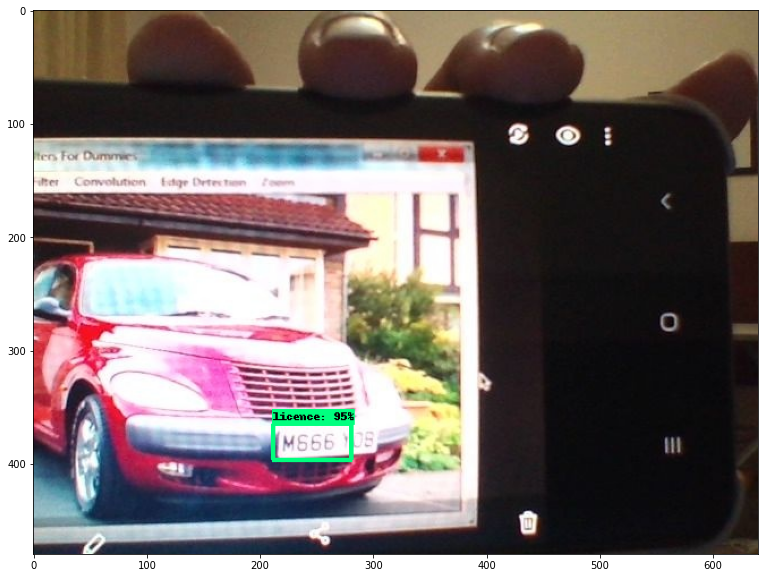

In [78]:
try:
  filename = take_photo('/content/drive/MyDrive/ANPR_and_EasyOCR/photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  #display(Image(filename))
  detectionsColabWEBCAM(filename, detect_func)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Helper Functions for Video

In [79]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

### Capture and Detect: In Real Time Video inside Colab

In [80]:
category_index

{1: {'id': 1, 'name': 'licence'}}

In [81]:
len(category_index)

1

In [82]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img_height, img_width, _ = img.shape
    
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get detections
    input_tensor = tf.convert_to_tensor(np.expand_dims(img, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
    detections['num_detections'] = num_detections

    #print(detections['num_detections']) #100

    #detection_classes should be ints.
    #detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
        
    count = 0
    for i, j, k in zip(detections['detection_boxes'], detections['detection_scores'], detections['detection_classes'] + label_id_offset):
      if j >= 0.6:
        
        #print(i, j, k)
        #print(type(i[0].item()))
        #Converting numpy.float to python float and to list
        bboxes = getattr(i, "tolist", lambda: i)()

        ymin, xmin, ymax, xmax = bboxes
        
        #Denormalizing BBox Coordinates
        #https://stackoverflow.com/questions/48915003/get-the-bounding-box-coordinates-in-the-tensorflow-object-detection-api-tutorial 
        (left, right, top, bottom) = (xmin * img_width, xmax * img_width, 
                                      ymin * img_height, ymax * img_height)

        (left, right, top, bottom) = (int(left), int(right), int(top), int(bottom))       
        #print(left, right, top, bottom)

        #Creating BBox on Overlay Image
        np.random.seed(10)
        category_color = [np.random.randint(0, 255) for i in range(len(category_index))]
        #print(category_color)
        bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), (category_color[int(k - 1)], 0, 0), 2)
        bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(category_index[k]['name'], j),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (category_color[int(k - 1)], 0, 0), 2)

      else:
        continue
      count += 1

    #print("Count", count)
    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# 12. Freezing the Graph

In [100]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [101]:
print(FREEZE_SCRIPT)
print(files['PIPELINE_CONFIG'])
print(paths['CHECKPOINT_PATH'])
print(paths['OUTPUT_PATH'])

Tensorflow/models/research/object_detection/exporter_main_v2.py 
Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config
Tensorflow/workspace/models/my_ssd_mobnet
Tensorflow/workspace/models/my_ssd_mobnet/export


In [102]:
command = "python {} --input_type=image_tensor \
--pipeline_config_path={} \
--trained_checkpoint_dir={} \
--output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [103]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [104]:
!{command}

2022-10-26 16:50:31.792904: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 16:50:32.923952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:50:32.924092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:50:32.924122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# 13. Conversion to TFJS

In [105]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 185 kB 67.6 MB/s 
     |████████████████████████████████| 40 kB 6.8 MB/s 
     |████████████████████████████████| 16.0 MB 47.8 MB/s 
     |████████████████████████████████| 145 kB 69.4 MB/s 
     |████████████████████████████████| 237 kB 70.9 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
     |████████████████████████████████| 85 kB 4.3 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [106]:
command = "tensorflowjs_converter \
--input_format=tf_saved_model \
--output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,\
num_detections,raw_detection_boxes,raw_detection_scores' \
--output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [107]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


In [108]:
!{command}

2022-10-26 16:51:33.028477: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 16:51:33.674519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:51:33.674622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:51:33.674641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# 14. Conversion to TFLite

In [109]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [110]:
command = "python {} \
--pipeline_config_path={} \
--trained_checkpoint_dir={} \
--output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [111]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [112]:
!{command}

2022-10-26 16:52:37.206432: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 16:52:38.630153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:52:38.630280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:52:38.630302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [113]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [114]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [115]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [116]:
!{command}

2022-10-26 16:55:01.121616: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 16:55:01.905518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:55:01.905620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-26 16:55:01.905638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# 15. Zip and Export Models 

In [117]:
print(paths['CHECKPOINT_PATH'])

Tensorflow/workspace/models/my_ssd_mobnet


In [118]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [119]:
!pip freeze > COLAB_Requirements.txt